In [ ]:
#%%

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#%%

# Carrega o arquivo CSV em um DataFrame
df = pd.read_csv('datasets\csv\DlCtrlSinr.csv')

df

Time  CellId  RNTI  BWPId   SINR(dB)
0      0.000071       2     0      0  -2.966220
1      0.000071       2     0      0 -31.728500
2      0.000071       2     0      0  -2.776600
3      0.000071       2     0      0  -5.812700
4      0.000071       2     0      0  -8.664980
...         ...     ...   ...    ...        ...
27735  1.999070       2     5      0   6.670910
27736  1.999070       2     4      0  -4.570180
27737  1.999070       2     3      0  -1.924510
27738  1.999070       2     2      0  -6.426820
27739  1.999070       2     1      0  -0.445678

[27740 rows x 5 columns]

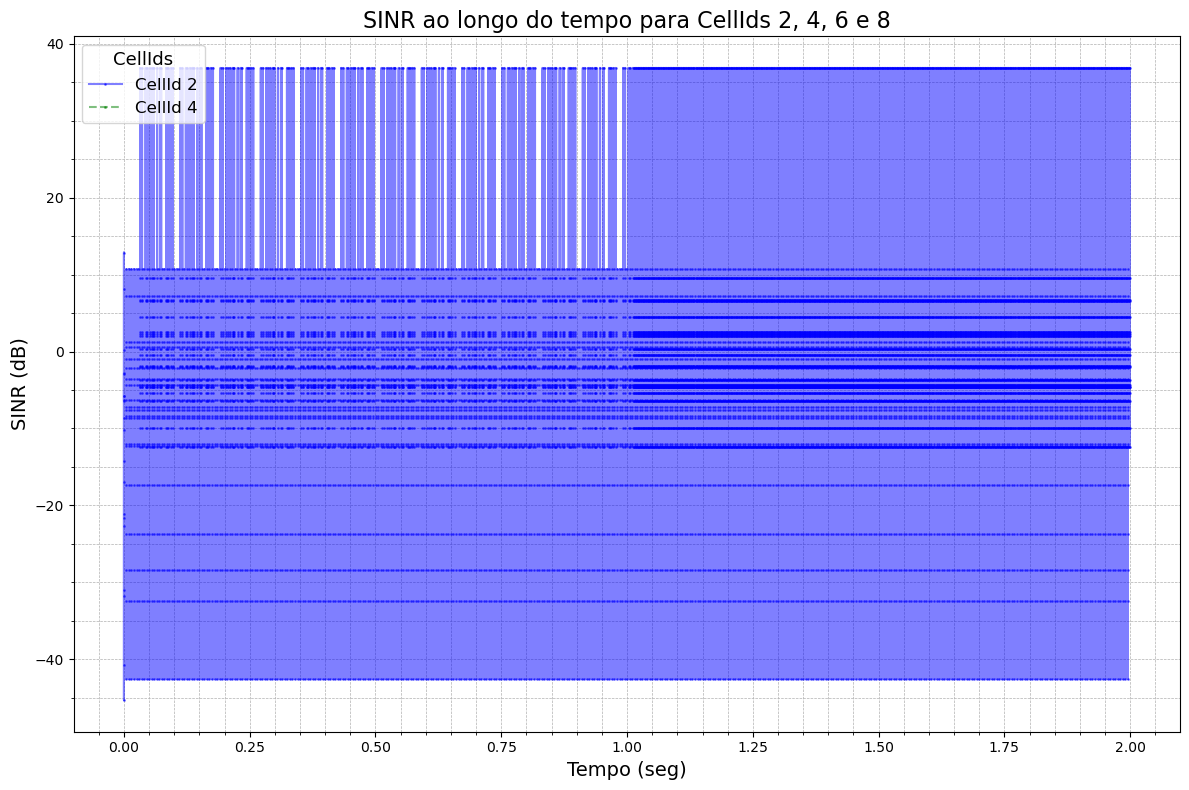

In [ ]:
# %%

# Função para filtrar DataFrame por CellId
def filter_by_CellId(df, CellId_values):
    return {CellId: df[df['CellId'] == CellId] for CellId in CellId_values}

CellId_values = [2,4]  # Apenas os valores de CellId 2, 4, 6 e 8
filtered_dfs = filter_by_CellId(df, CellId_values)

# Configurações do gráfico
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Define cores para cada usuário
markers = ['o', 's', 'o', 's']  # Define marcadores para cada usuário
linestyles = ['-', '--', '--', '--']  # Define estilos de linha para cada usuário

# Plota o gráfico de SINR ao longo do tempo para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i], marker=markers[i], linestyle=linestyles[i], markersize=1, linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez

plt.title('SINR ao longo do tempo para CellIds 2, 4, 6 e 8', fontsize=16)
plt.xlabel('Tempo (seg)', fontsize=14)
plt.ylabel('SINR (dB)', fontsize=14)
plt.legend(title='CellIds', fontsize=12, title_fontsize='13')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

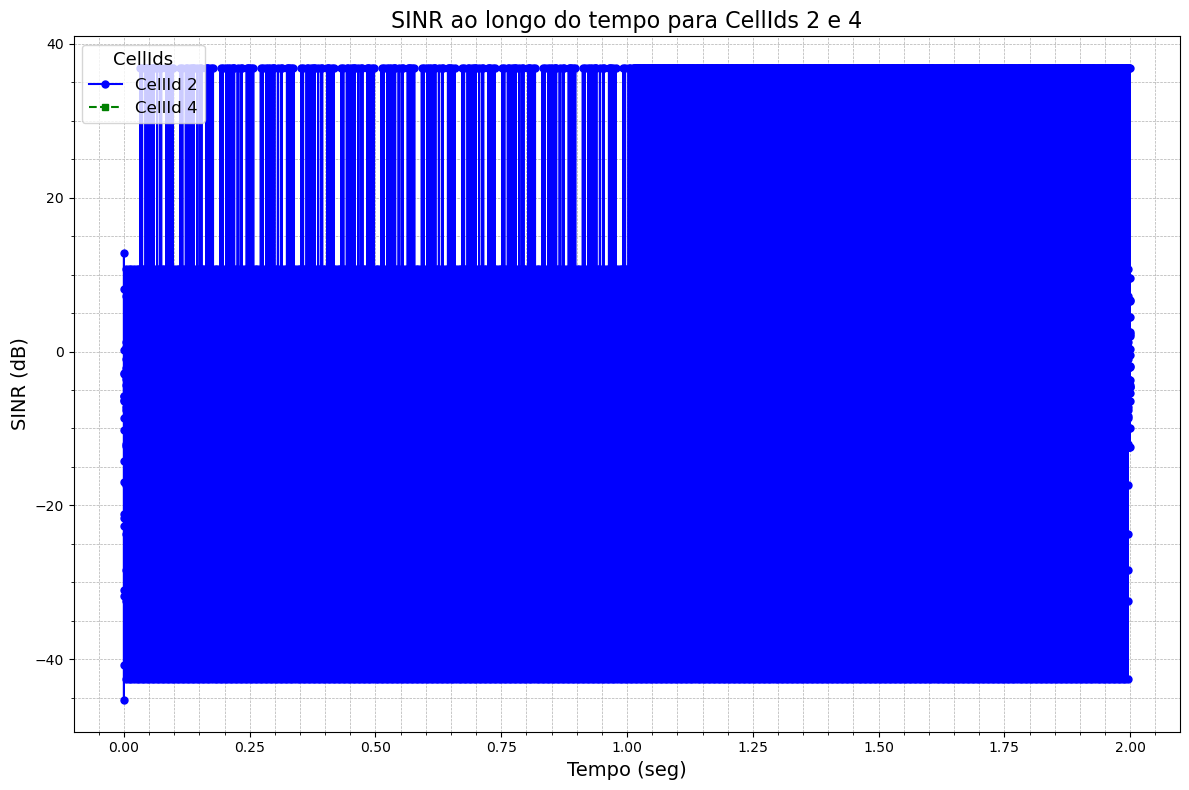

In [ ]:
#%%

# Gráfico limpo
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Define cores para cada usuário
markers = ['o', 's', 'd', '^']  # Define marcadores para cada usuário
linestyles = ['-', '--', '-.', ':']  # Define estilos de linha para cada usuário

# Plota o gráfico de SINR ao longo do tempo para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i], marker=markers[i], linestyle=linestyles[i], markersize=5, linewidth=1.5)

plt.title('SINR ao longo do tempo para CellIds 2 e 4', fontsize=16)
plt.xlabel('Tempo (seg)', fontsize=14)
plt.ylabel('SINR (dB)', fontsize=14)
plt.legend(title='CellIds', fontsize=12, title_fontsize='13')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

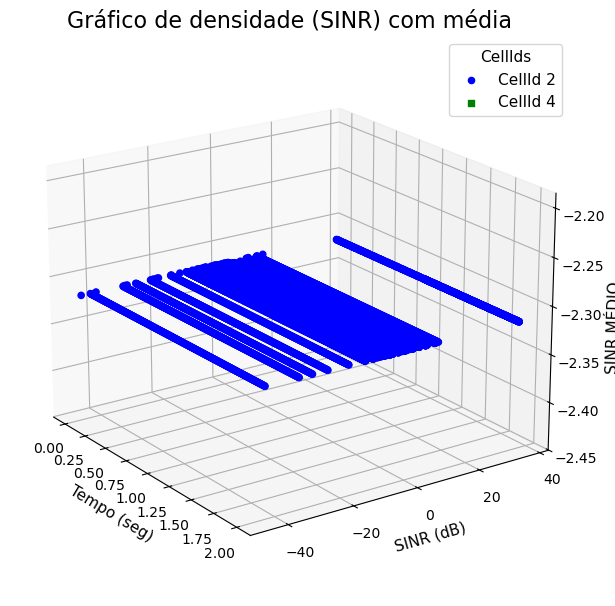

In [ ]:
#%%

# Gráfico de densidade 3D para cada CellId

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota o gráfico de densidade 3D para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    x = user_df['Time']
    y = user_df['SINR(dB)']
    z_stat = user_df['SINR(dB)'].mean()  # Calcula a média do SINR para cada CellId
    z = np.zeros_like(x) + z_stat  # Usa a média do SINR como valor do eixo z
    
    ax.scatter(x, y, z, label=f'CellId {CellId}', color=colors[i % len(colors)], marker=markers[i % len(markers)], alpha=0.1)  # Define alpha para 0.1 para mais translucidez

# Adiciona a legenda separadamente para evitar transparência
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_alpha(1.0)  # Define alpha para 1.0 para itens da legenda

ax.set_title('Gráfico de densidade (SINR) com média', fontsize=16)
ax.set_xlabel('Tempo (seg)', fontsize=11)
ax.set_ylabel('SINR (dB)', fontsize=11)
ax.legend(handles, labels, title='CellIds', fontsize=11, title_fontsize='11')
ax.view_init(elev=20., azim=-35)  # Ajusta a elevação e o ângulo para melhor visualização
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)  # Ajusta o gráfico para fazer espaço para o rótulo do eixo z
ax.set_zlabel('SINR MÉDIO', fontsize=11)
plt.show()

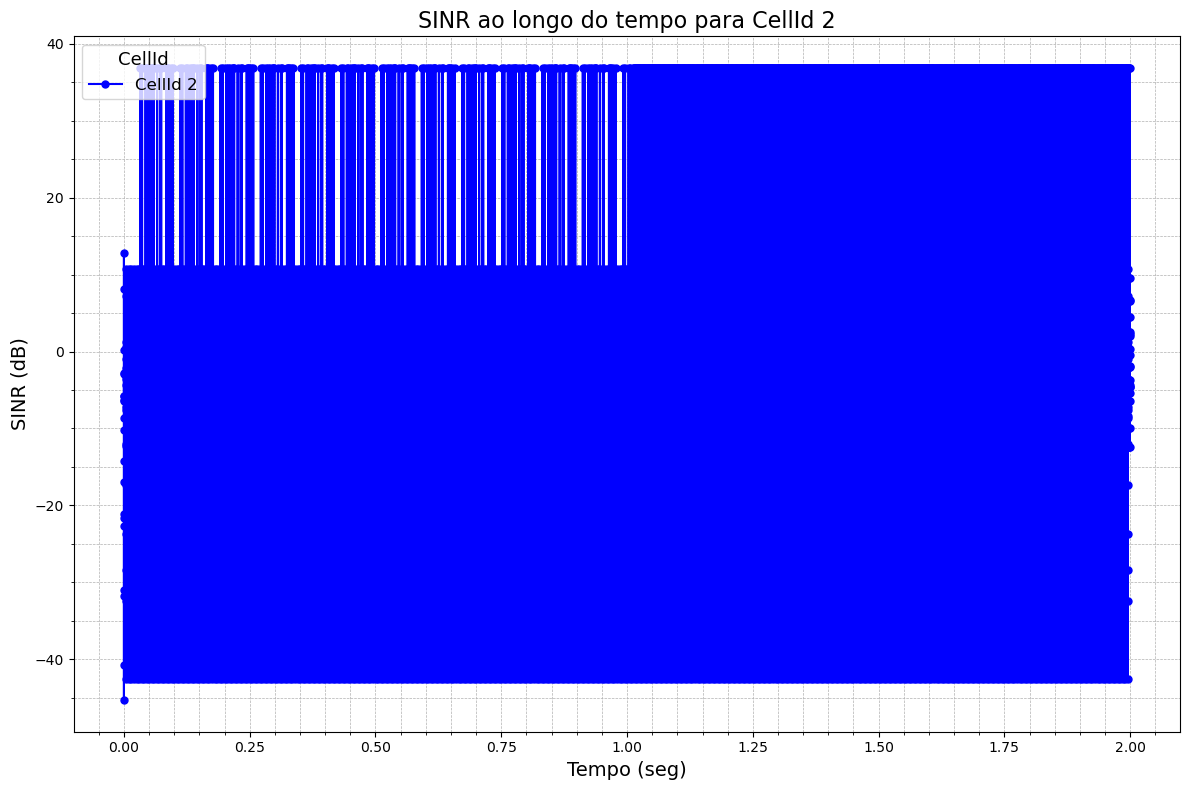

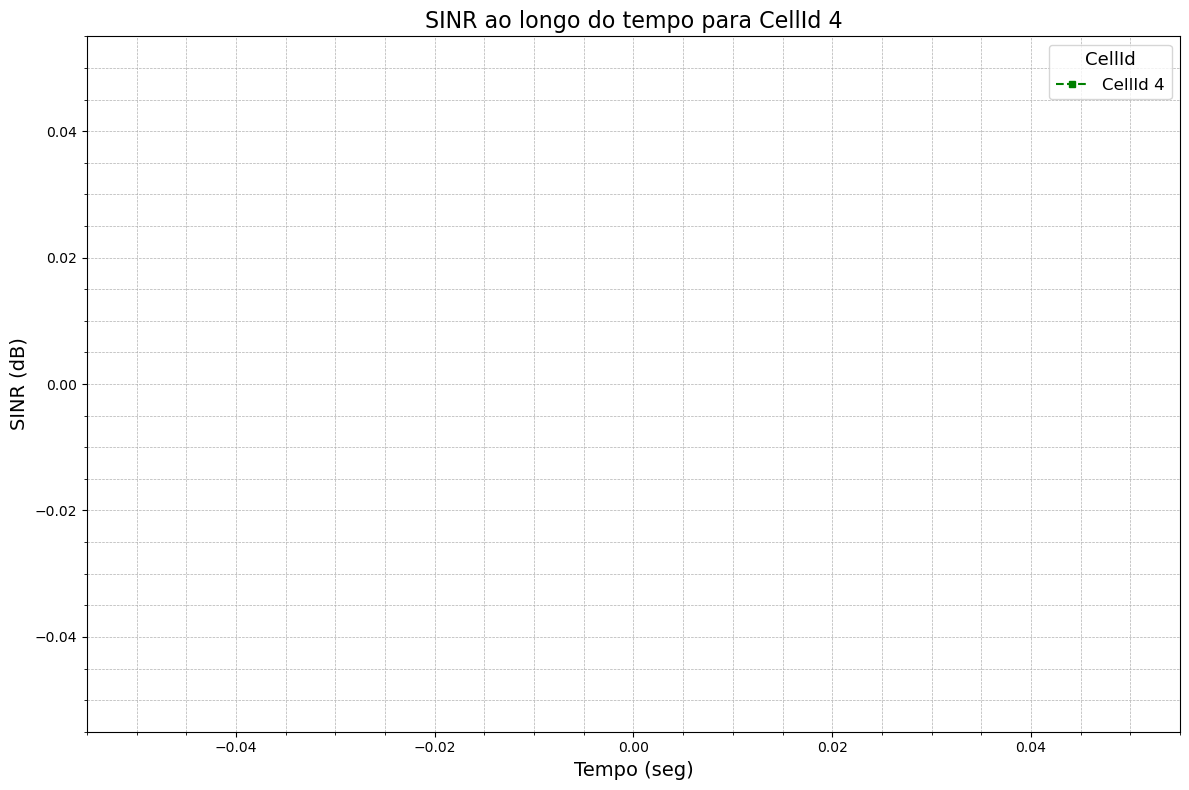

In [ ]:
#%%

# Gráficos separados para cada CellId
for i, CellId in enumerate(CellId_values):
    plt.figure(figsize=(12, 8))
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i % len(colors)], marker=markers[i % len(markers)], linestyle=linestyles[i % len(linestyles)], markersize=5, linewidth=1.5)
    
    plt.title(f'SINR ao longo do tempo para CellId {CellId}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

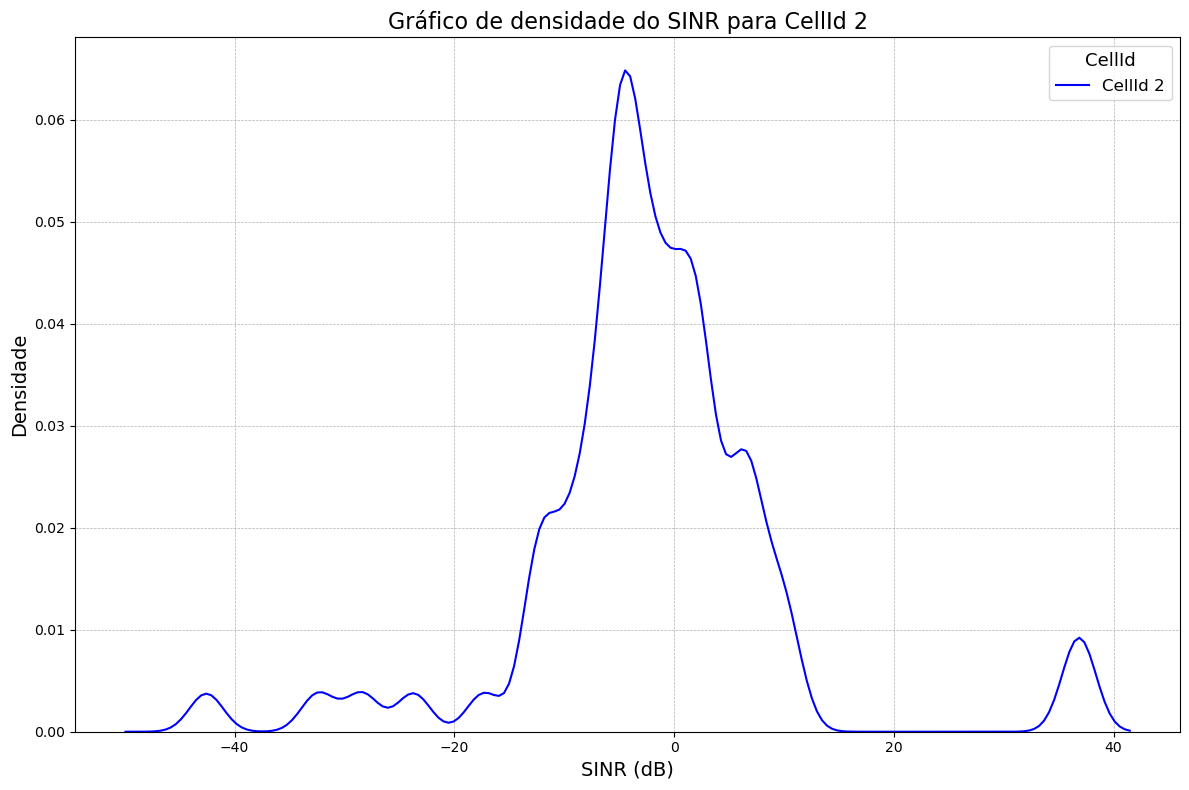

<ipython-input-7-d4b0ff07ae87>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='CellId', fontsize=12, title_fontsize='13')


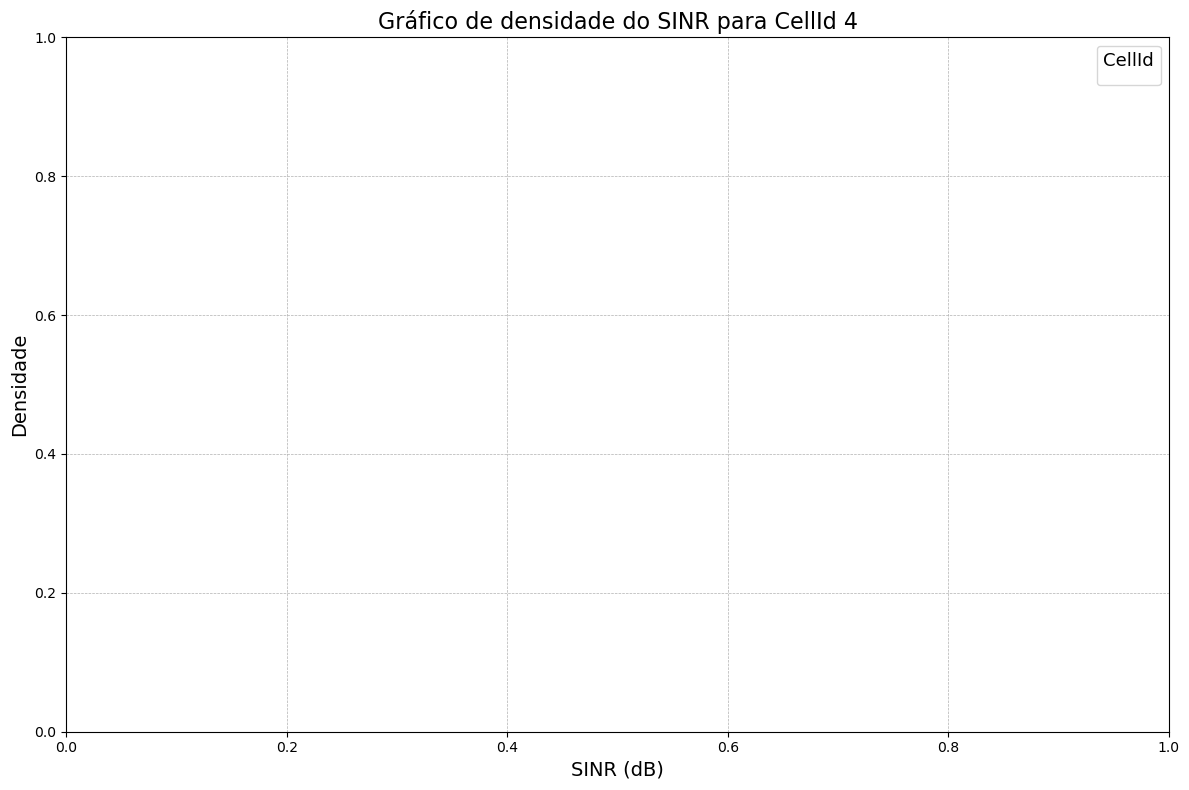

In [ ]:
#%%

# Gráfico de densidade para cada CellId
for i, CellId in enumerate(CellId_values):
    plt.figure(figsize=(12, 8))
    user_df = filtered_dfs[CellId]
    sns.kdeplot(user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], linewidth=1.5)
    
    plt.title(f'Gráfico de densidade do SINR para CellId {CellId}', fontsize=16)
    plt.xlabel('SINR (dB)', fontsize=14)
    plt.ylabel('Densidade', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

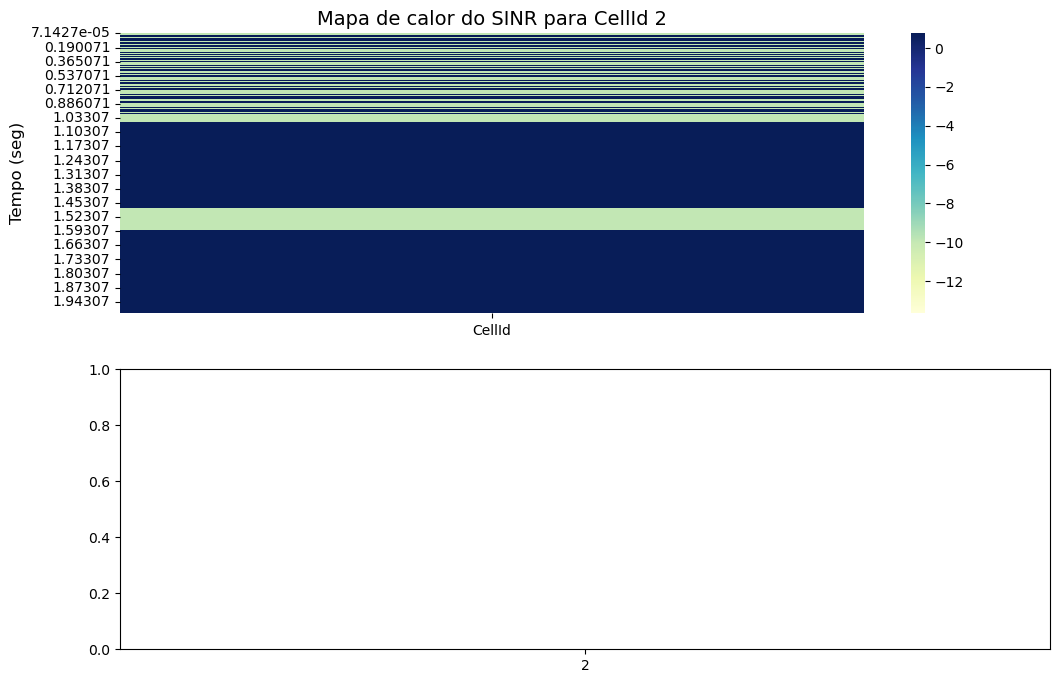

In [ ]:
#%%

# Gráfico de mapa de calor usando seaborn
fig, axs = plt.subplots(len(CellId_values), 1, figsize=(12, 8), sharex=True)

# Plota o gráfico de mapa de calor para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    
    # Remove duplicatas agregando pela média
    user_df = user_df.groupby(['Time', 'CellId'], as_index=False).mean()
    
    pivot_table = user_df.pivot(index="Time", columns="CellId", values="SINR(dB)")
    sns.heatmap(pivot_table, ax=axs[i], cmap="YlGnBu", cbar=True)
    
    axs[i].set_title(f'Mapa de calor do SINR para CellId {CellId}', fontsize=14)
    axs[i].set_ylabel('Tempo (seg)', fontsize=12)

axs[-1].set_xlabel('CellId', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# %%

# Agrupa o DataFrame por CellId e descreve as estatísticas do SINR
grouped_df = df.groupby('CellId')['SINR(dB)'].describe()
grouped_df

count      mean        std      min      25%      50%      75%  \
CellId                                                                     
2       27740.0 -2.317743  11.913672 -45.3095 -6.42682 -2.20264  2.21419   

            max  
CellId           
2       36.8572

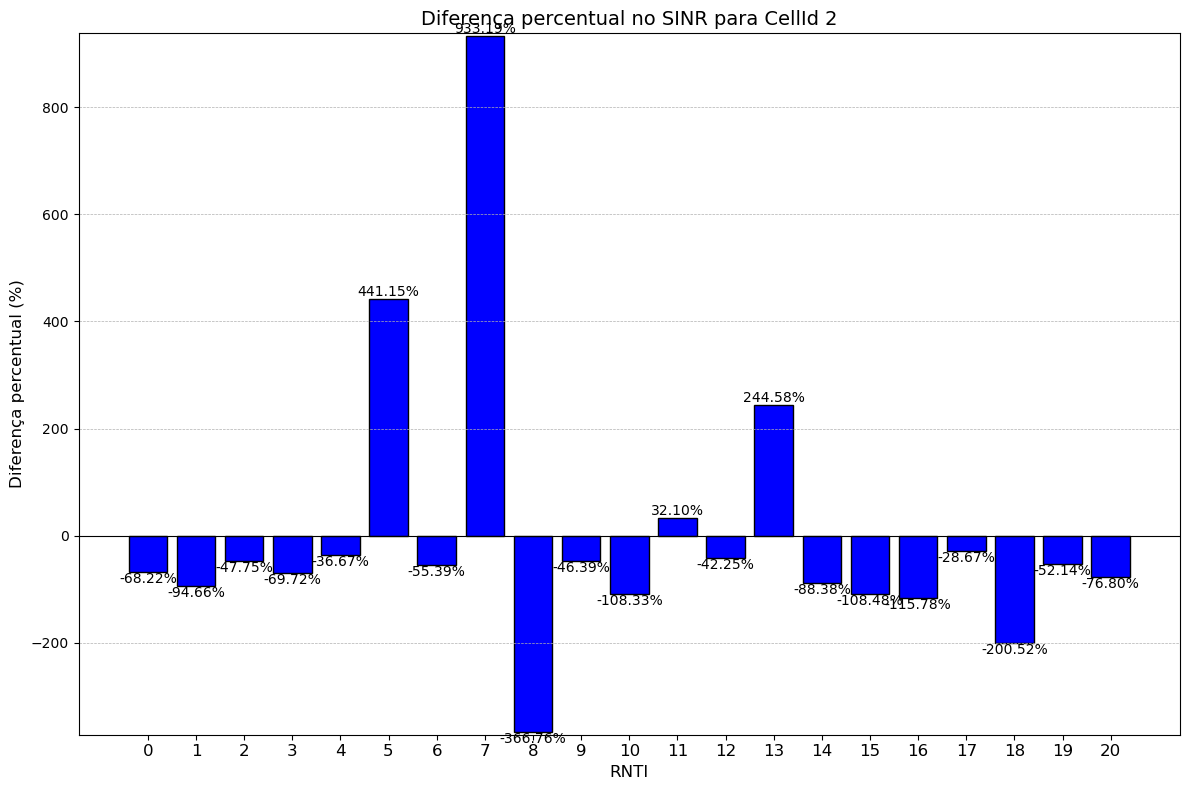

ValueError: min() arg is an empty sequence

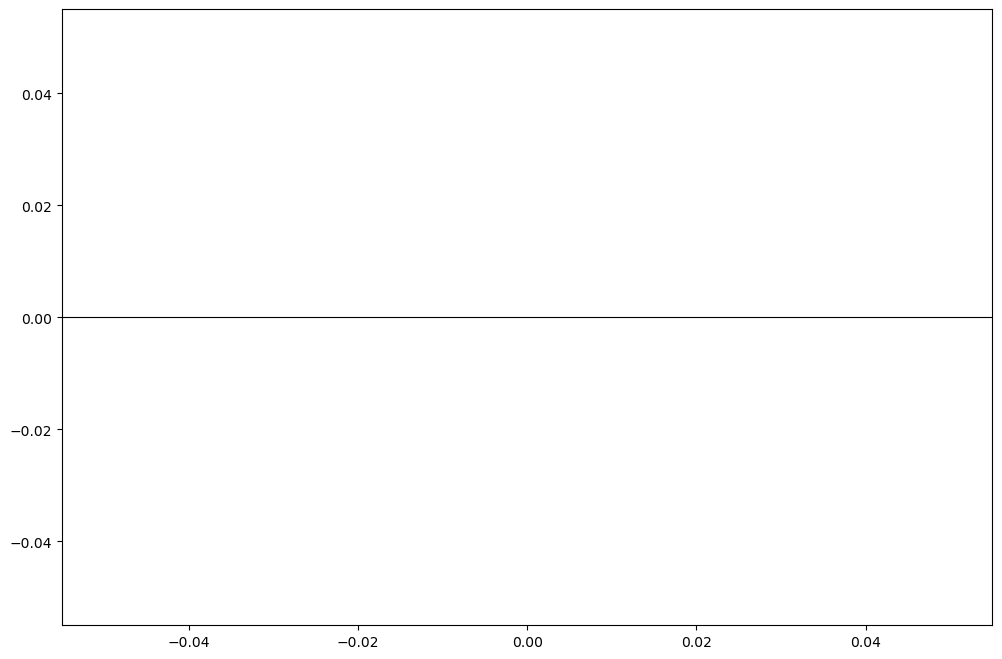

In [ ]:
# %%

# Calcula a diferença percentual para cada CellId no início e no final da coluna Time
percentage_diff = {}

# Obtém valores únicos de RNTI
rnti_values = df['RNTI'].unique()

# Calcula a diferença percentual para cada CellId e RNTI
for CellId in CellId_values:
    percentage_diff[CellId] = {}
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            start_time = user_df['Time'].min()
            end_time = user_df['Time'].max()
            
            start_sinr = user_df[user_df['Time'] == start_time]['SINR(dB)'].values[0]
            end_sinr = user_df[user_df['Time'] == end_time]['SINR(dB)'].values[0]
            
            percentage_diff[CellId][RNTI] = ((end_sinr - start_sinr) / start_sinr) * 100

# Plota a diferença percentual para cada CellId e RNTI
for CellId in CellId_values:
    fig, ax = plt.subplots(figsize=(12, 8))
    rnti_diff = percentage_diff[CellId]
    bars = ax.bar(rnti_diff.keys(), rnti_diff.values(), color=[colors[CellId_values.index(CellId) % len(colors)] for _ in range(len(rnti_diff))], edgecolor='black')
    
    # Adiciona rótulos de valor no topo de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10, color='black')
    
    ax.axhline(0, color='black', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
    ax.set_ylim(min(rnti_diff.values()) - 5, max(rnti_diff.values()) + 5)  # Ajusta os limites do eixo y com uma margem
    ax.set_title(f'Diferença percentual no SINR para CellId {CellId}', fontsize=14)
    ax.set_ylabel('Diferença percentual (%)', fontsize=12)
    ax.set_xlabel('RNTI', fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
    ax.set_xticks(list(rnti_diff.keys()))
    ax.set_xticklabels([int(rnti) for rnti in rnti_diff.keys()], fontsize=12)
    plt.tight_layout()
    plt.show()

c:\Users\Marcos Hiarley\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Marcos Hiarley\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


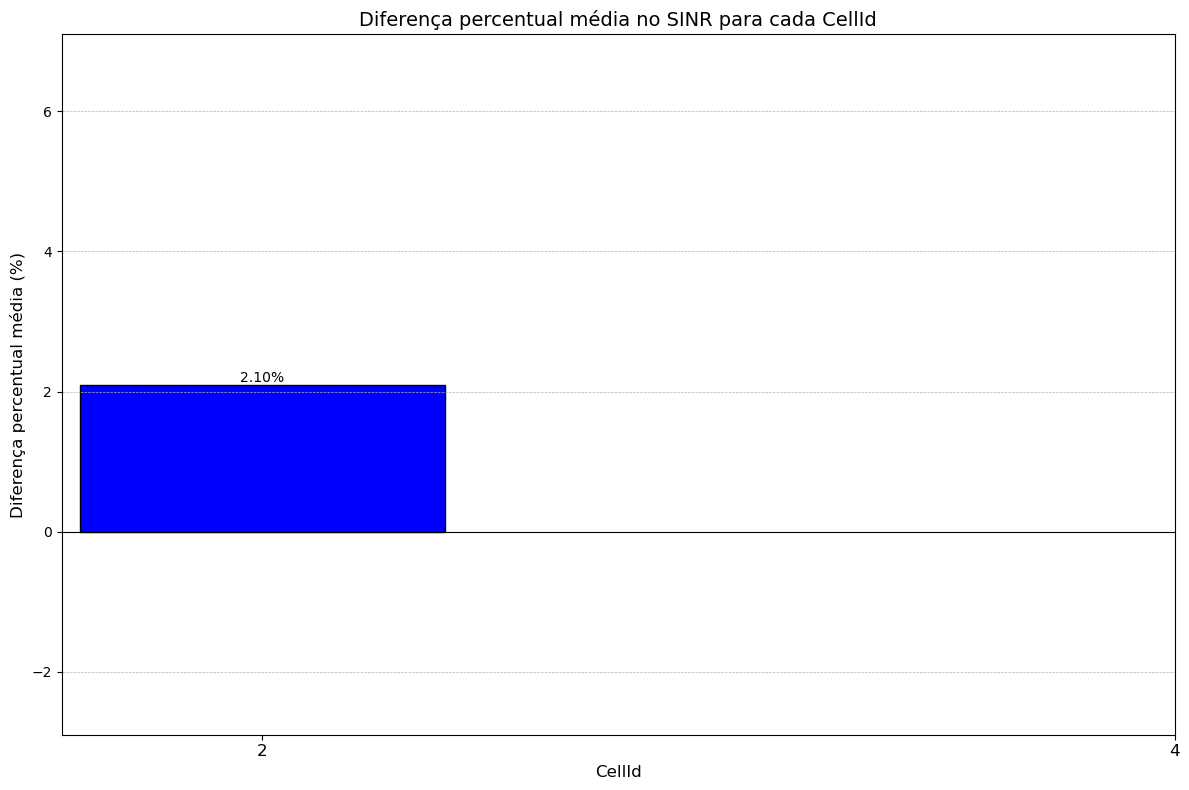

In [ ]:
# %%

# Calcula a diferença percentual média para cada CellId
average_percentage_diff = {CellId: np.mean(list(rnti_diff.values())) for CellId, rnti_diff in percentage_diff.items()}

# Plota a diferença percentual média para cada CellId
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(average_percentage_diff.keys(), average_percentage_diff.values(), color=[colors[CellId_values.index(CellId) % len(colors)] for CellId in average_percentage_diff.keys()], edgecolor='black')

# Adiciona rótulos de valor no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10, color='black')

ax.axhline(0, color='black', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
ax.set_ylim(min(average_percentage_diff.values()) - 5, max(average_percentage_diff.values()) + 5)  # Ajusta os limites do eixo y com uma margem
ax.set_title('Diferença percentual média no SINR para cada CellId', fontsize=14)
ax.set_ylabel('Diferença percentual média (%)', fontsize=12)
ax.set_xlabel('CellId', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
ax.set_xticks(list(average_percentage_diff.keys()))
ax.set_xticklabels([int(cellid) for cellid in average_percentage_diff.keys()], fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# %%

# Cria um DataFrame para armazenar os valores de tempo inicial e final para cada RNTI e CellId
time_values = []

for CellId in CellId_values:
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            start_time = user_df['Time'].min()
            end_time = user_df['Time'].max()
            start_sinr = user_df[user_df['Time'] == start_time]['SINR(dB)'].values[0]
            end_sinr = user_df[user_df['Time'] == end_time]['SINR(dB)'].values[0]
            time_values.append({'CellId': CellId, 'RNTI': RNTI, 'Start Time': start_time, 'End Time': end_time, 'Start SINR': start_sinr, 'End SINR': end_sinr})

time_df = pd.DataFrame(time_values)
time_df

CellId  RNTI  Start Time  End Time  Start SINR   End SINR
0        2     0    0.000071  0.020071   -2.966220  -0.942756
1        2     8    0.025071  1.999070   -0.942756   2.514890
2        2     9    0.025071  1.999070   -8.650850  -4.637340
3        2    10    0.025071  1.999070   -3.551090   0.295864
4        2    11    0.025071  1.999070    7.245500   9.571350
5        2    12    0.025071  1.999070   -7.621420  -4.401260
6        2    13    0.025071  1.999070   10.696300  36.857200
7        2    14    0.025071  1.999070  -32.398000  -3.765380
8        2    15    0.025071  1.999070  -23.720000   2.011760
9        2    16    0.025071  1.999070  -28.398500   4.479980
10       2    17    0.025071  1.999070  -17.319900 -12.353700
11       2    18    0.025071  1.999070   -2.202640   2.214190
12       2    19    0.025071  1.999070   -4.338720  -2.076630
13       2    20    0.025071  1.999070  -42.572800  -9.878250
14       2     7    0.025071  1.999070    0.630995   6.519380
15       2     6    0.025071  1.999070  -12.082200  -5.389830
16       2     5    0.025071  1.999070    1.232730   6.670910
17       2     4    0.025071  1.999070   -7.216040  -4.570180
18       2     3    0.025071  1.999070   -6.355750  -1.924510
19       2     2    0.025071  1.999070  -12.299500  -6.426820
20       2     1    0.025071  1.999070   -8.352090  -0.445678

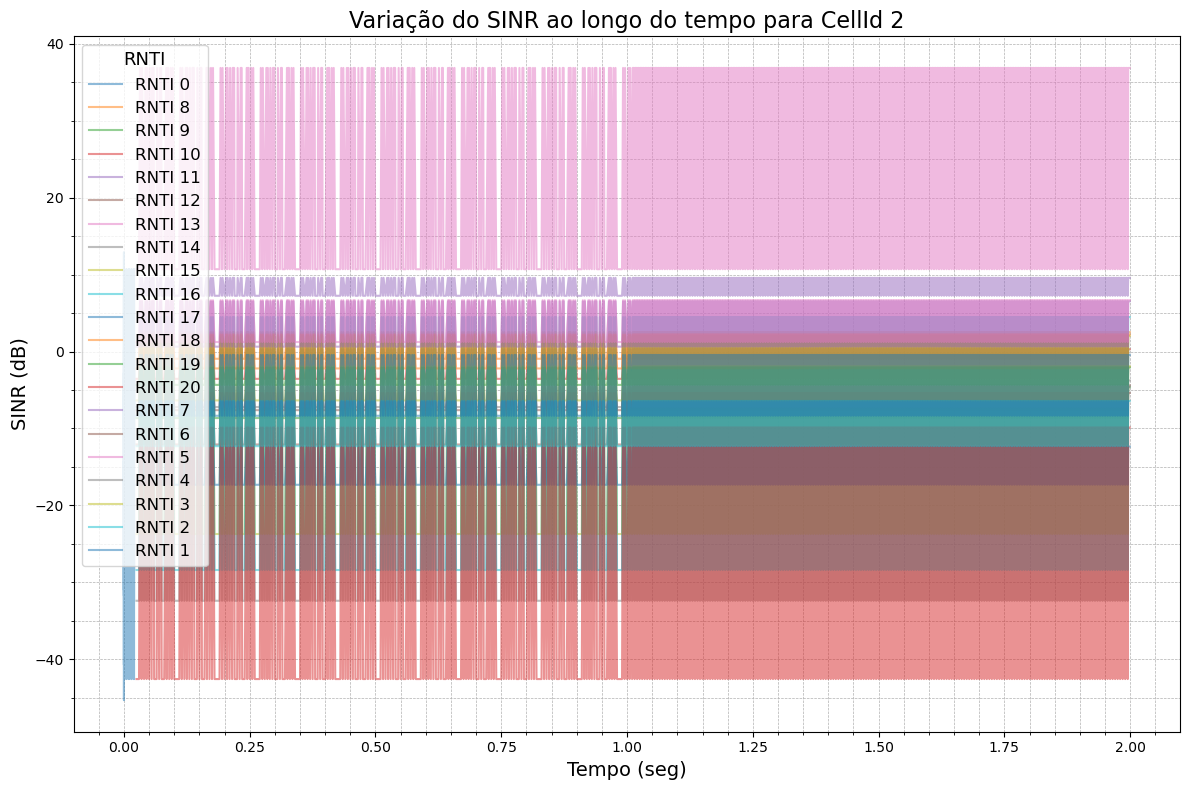

<ipython-input-13-5d9469c79361>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='RNTI', fontsize=12, title_fontsize='13')


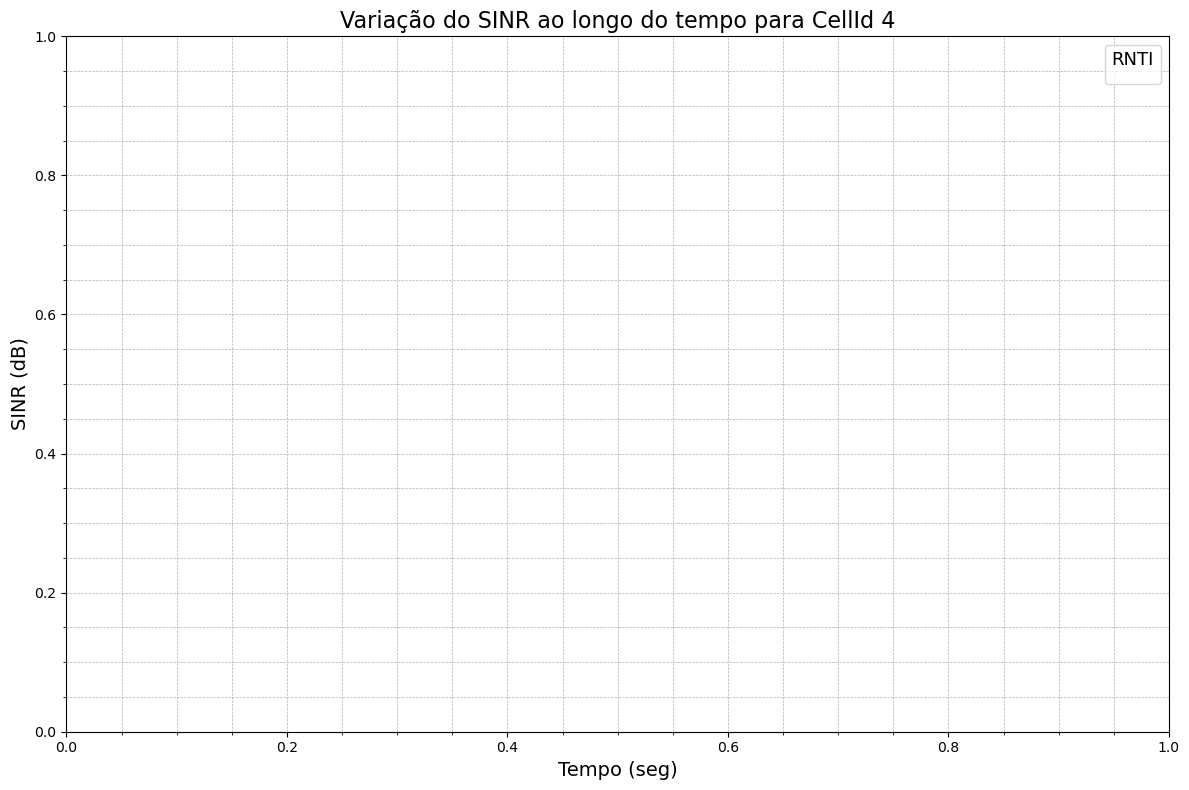

In [ ]:
# %%

# Plota a variação do SINR ao longo do tempo para cada RNTI, separado por CellId
for CellId in CellId_values:
    plt.figure(figsize=(12, 8))
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'RNTI {RNTI}', linestyle='-', linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez
    
    plt.title(f'Variação do SINR ao longo do tempo para CellId {CellId}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='RNTI', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

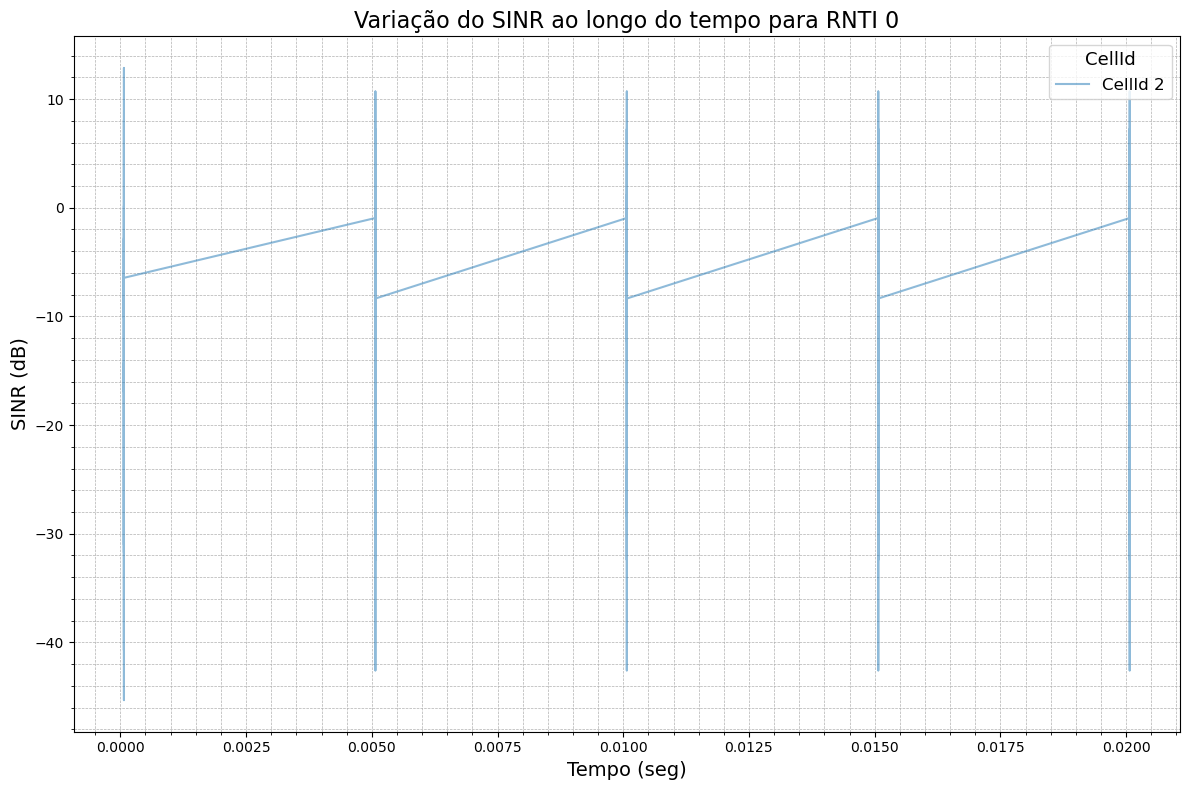

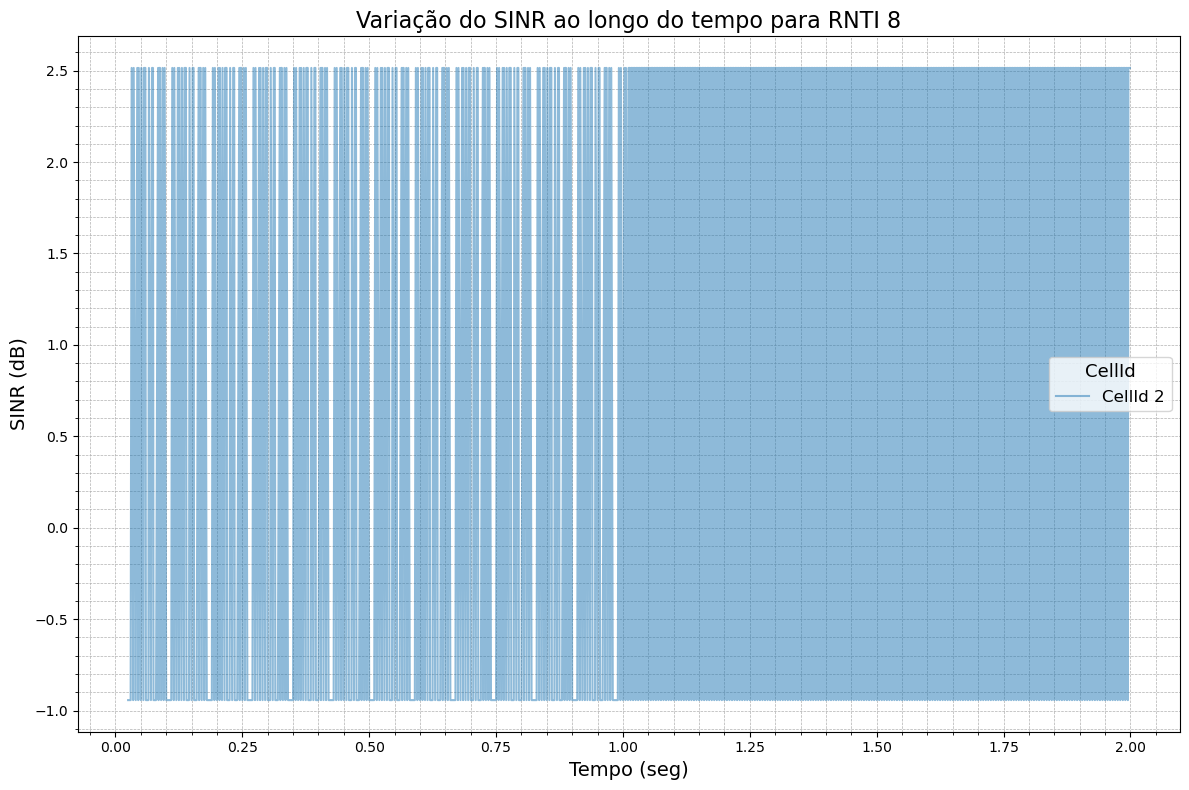

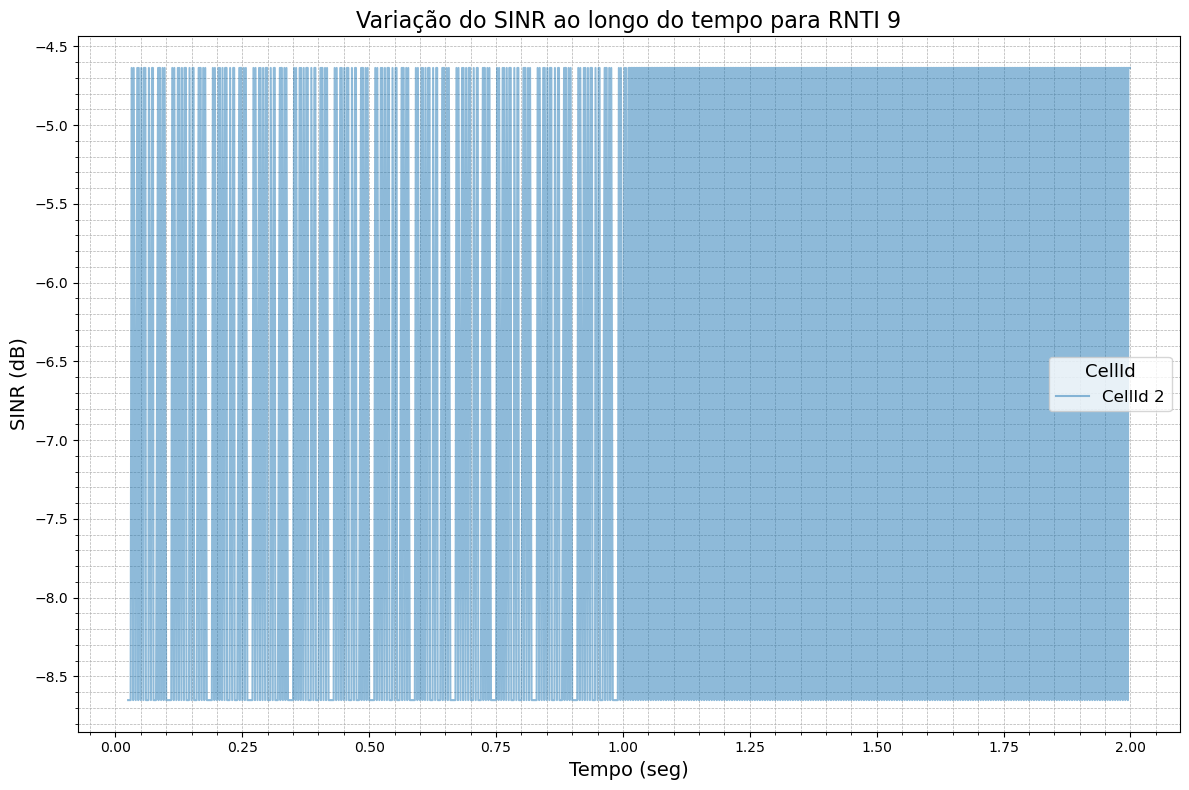

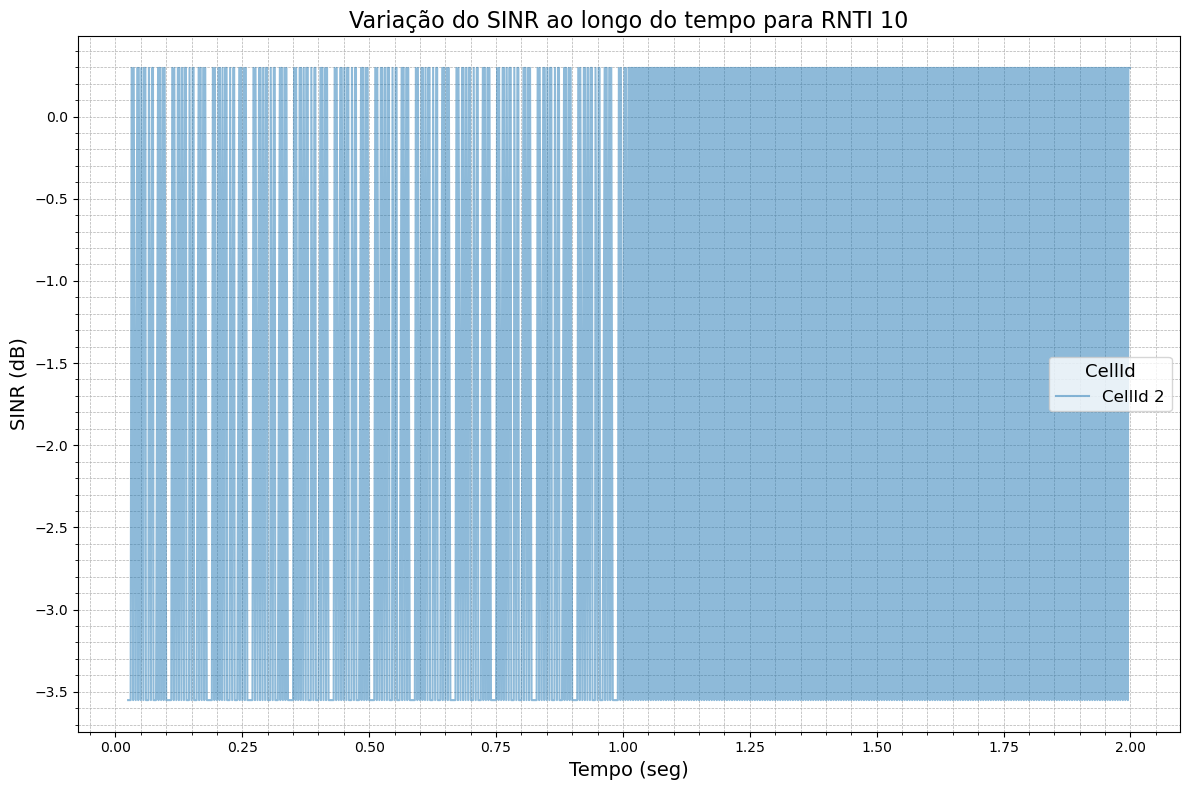

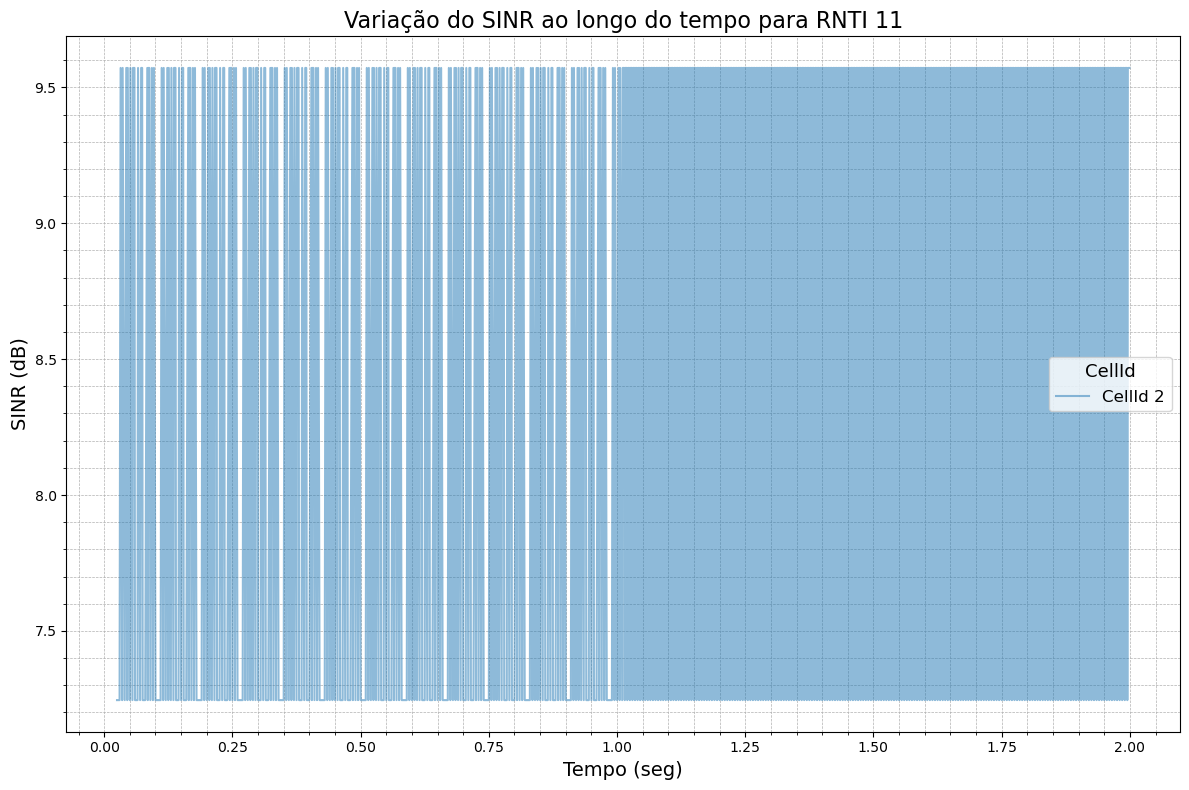

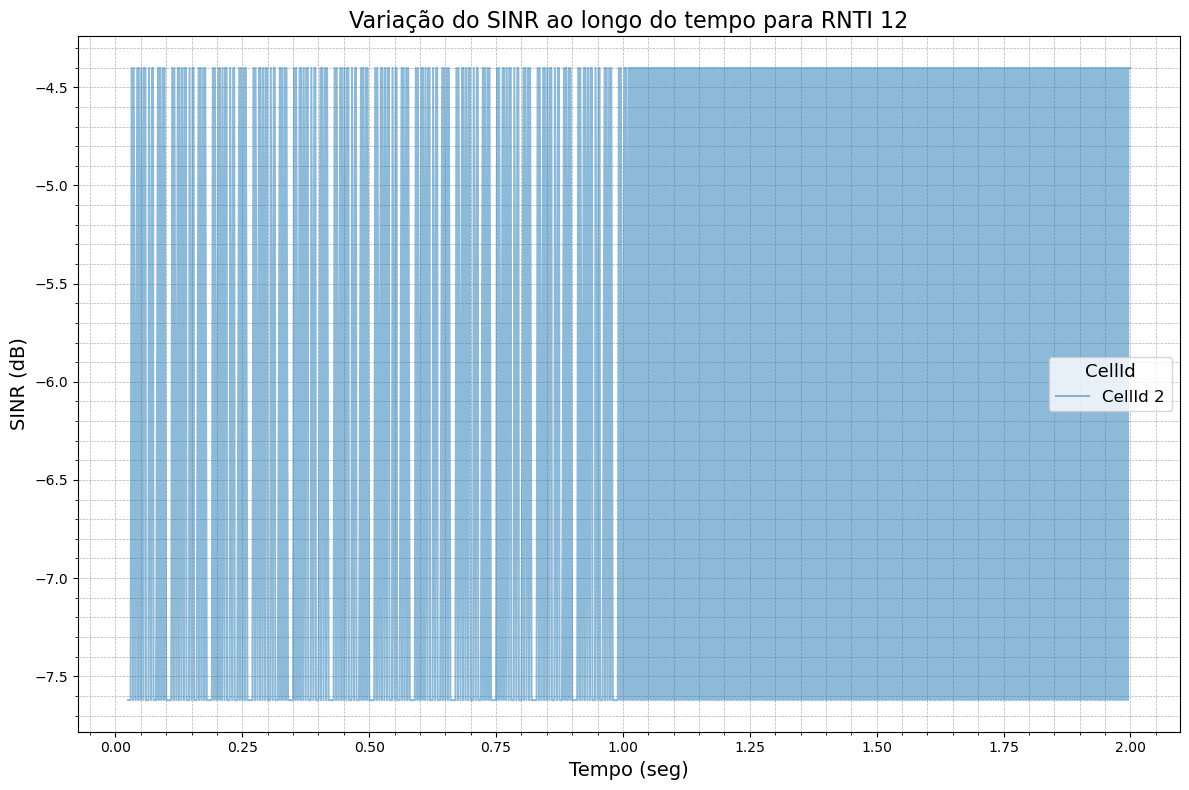

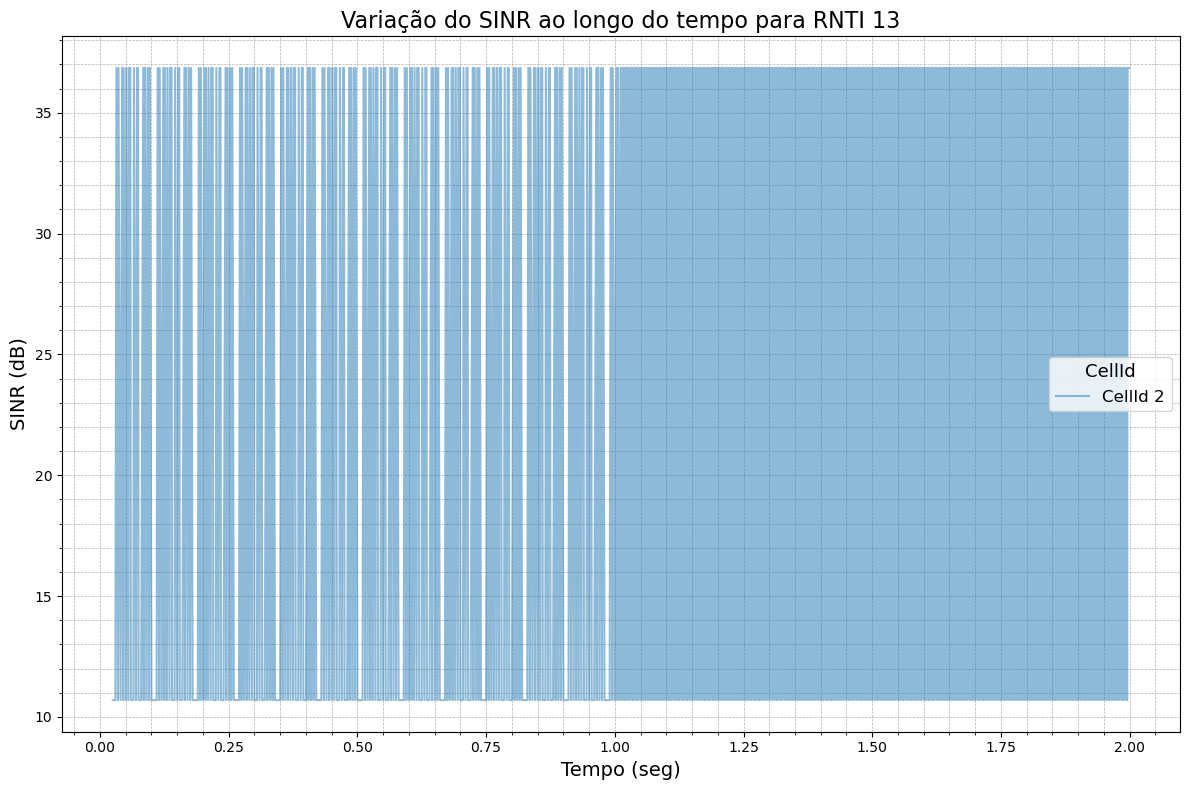

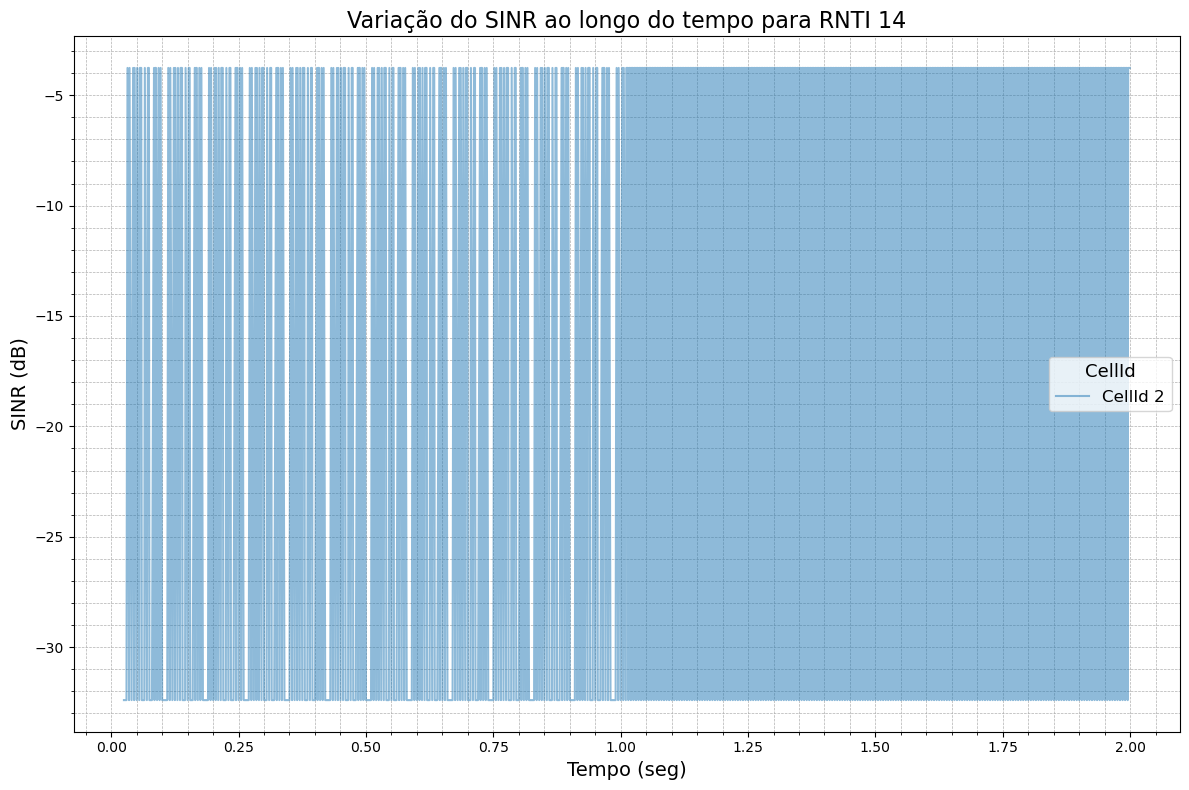

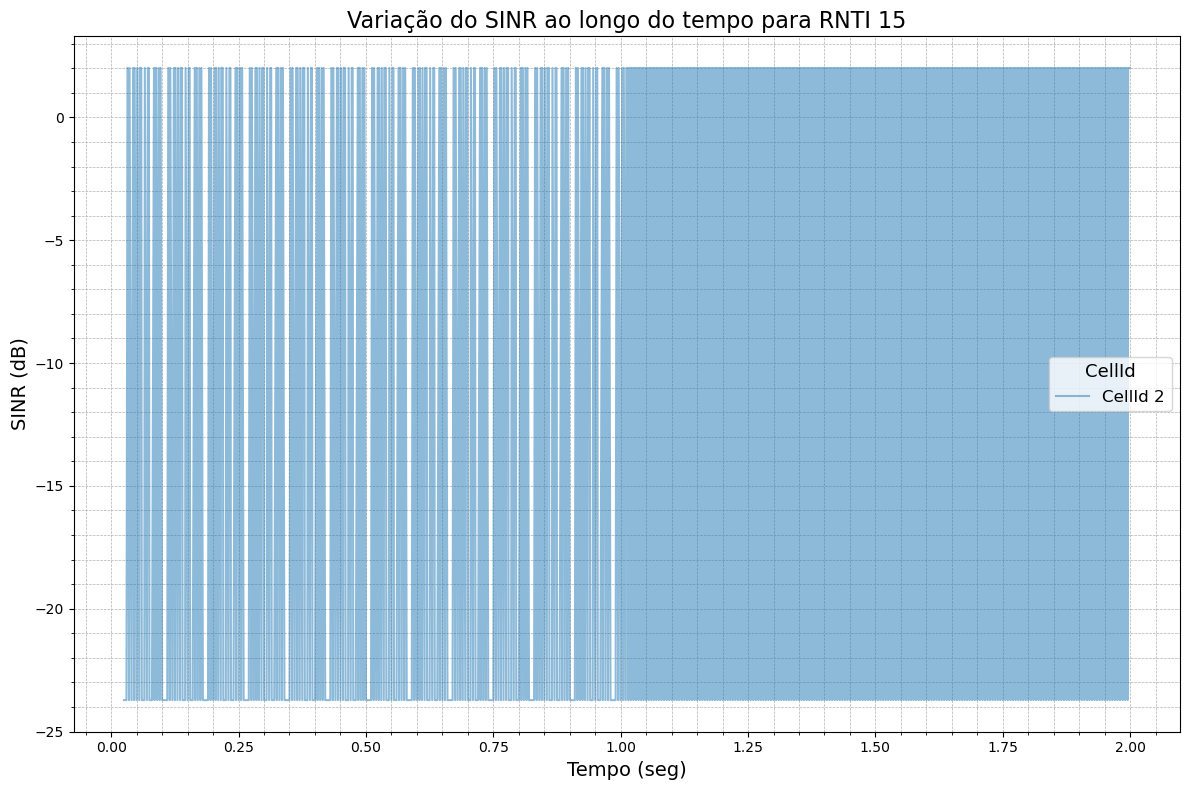

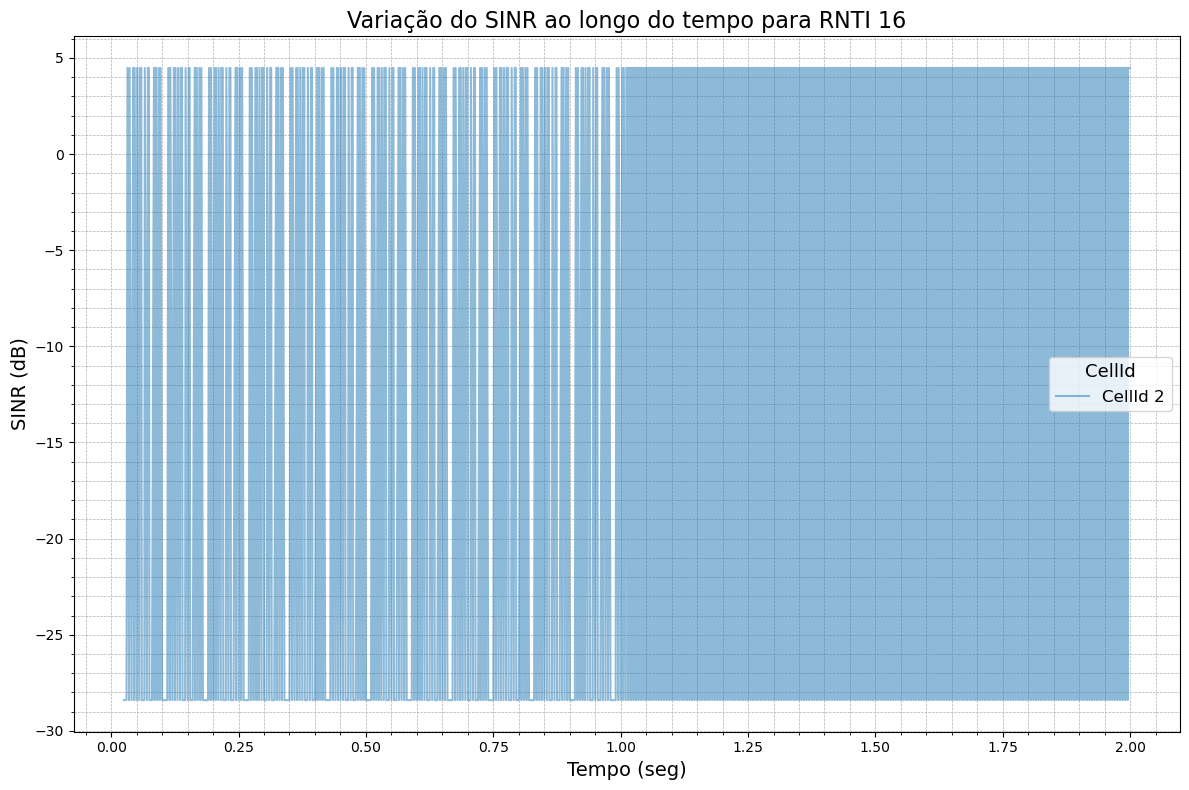

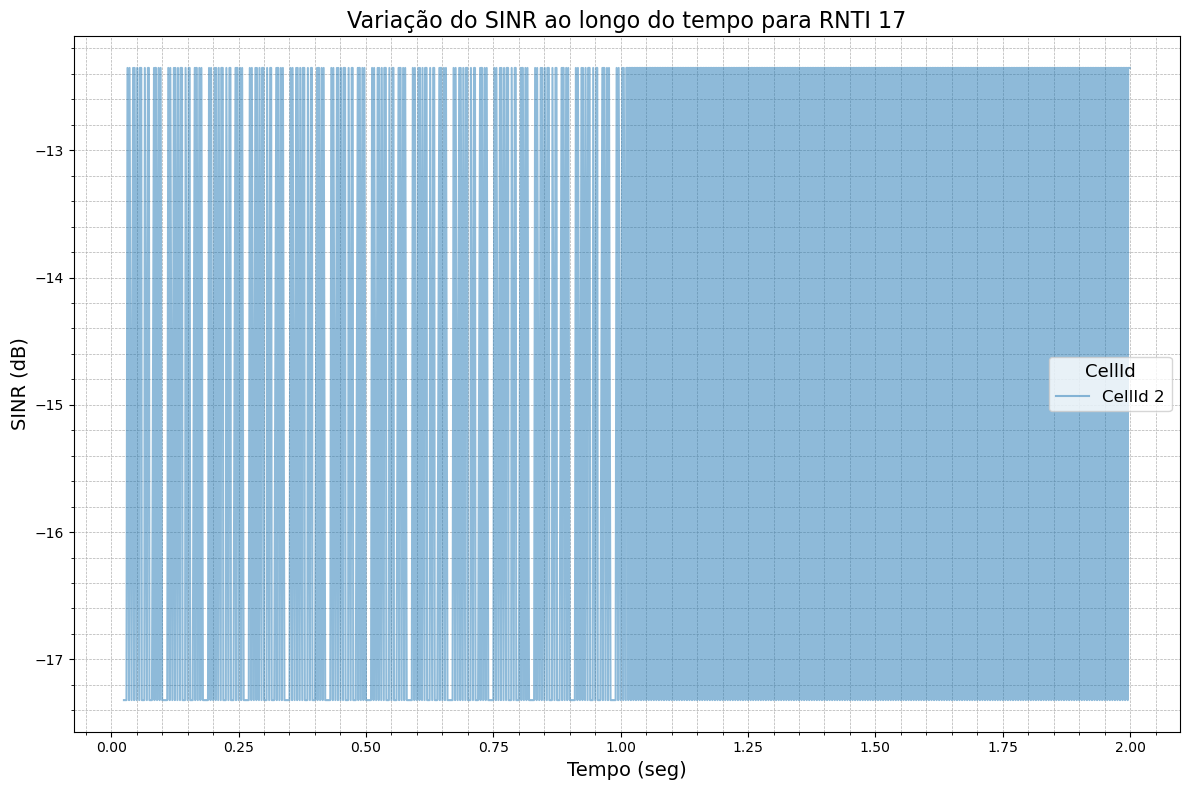

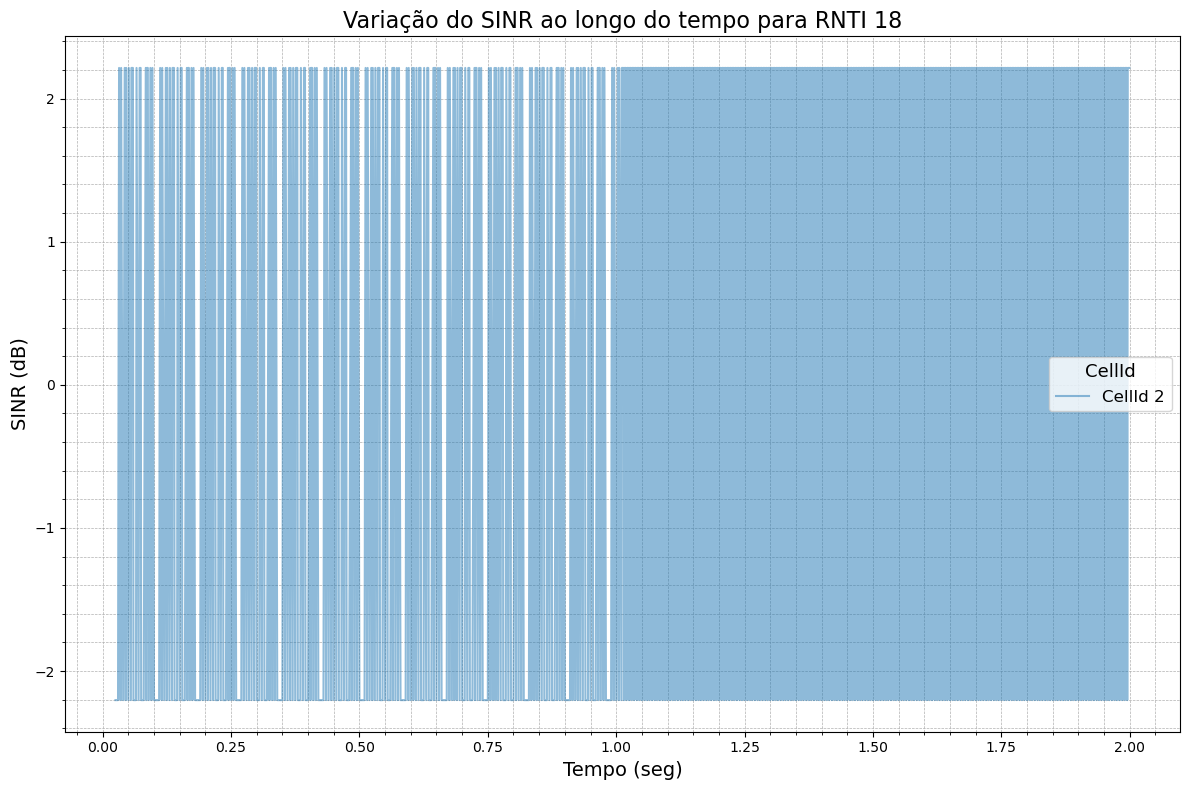

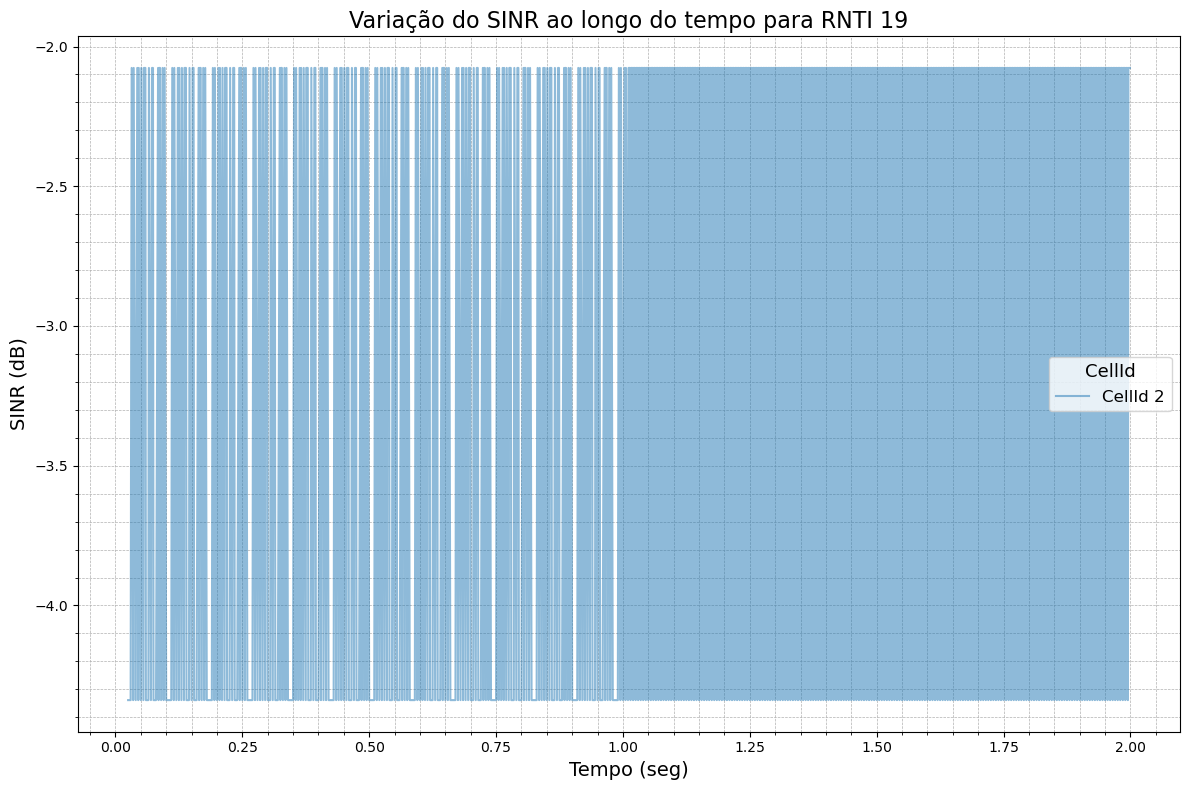

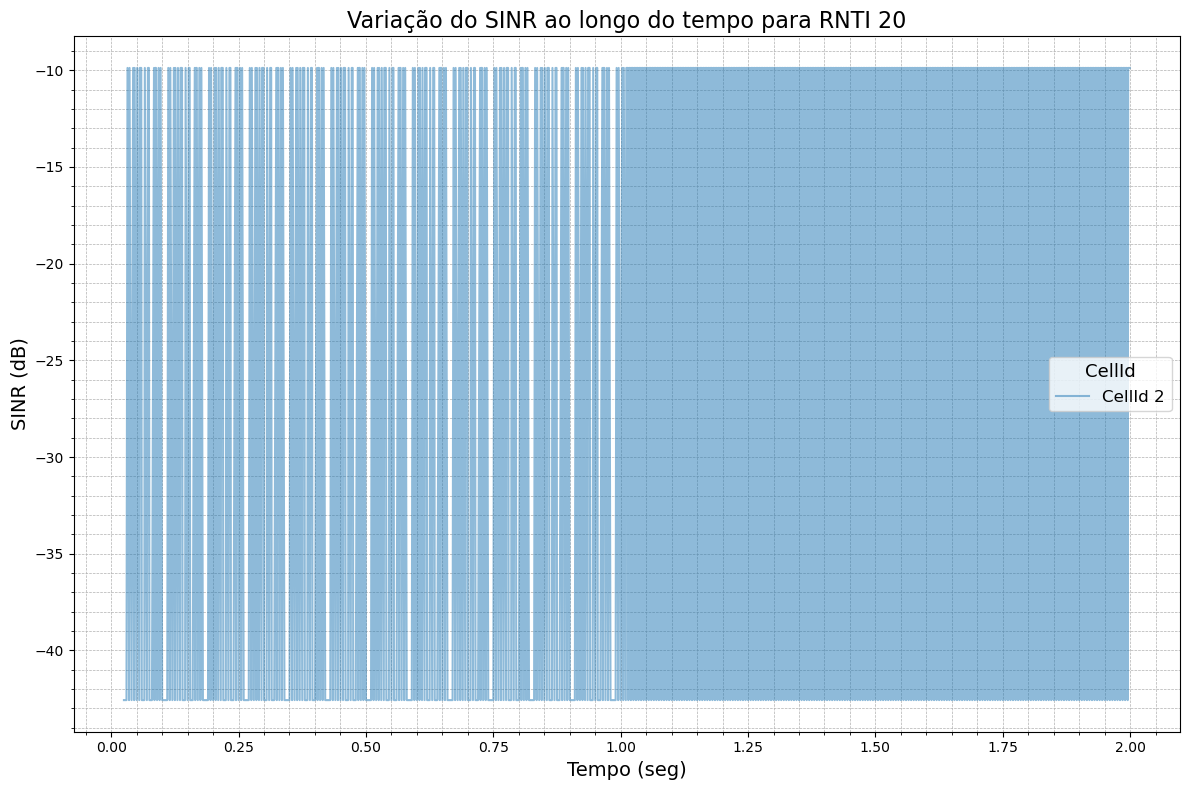

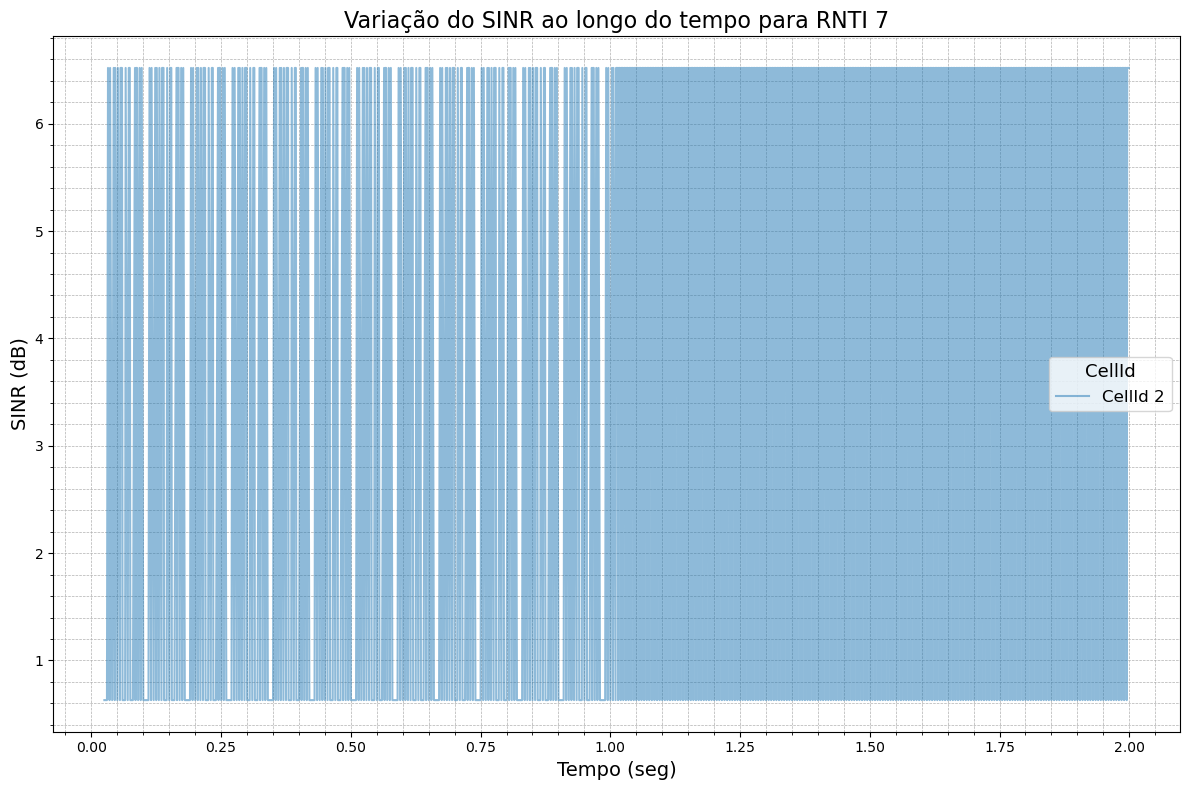

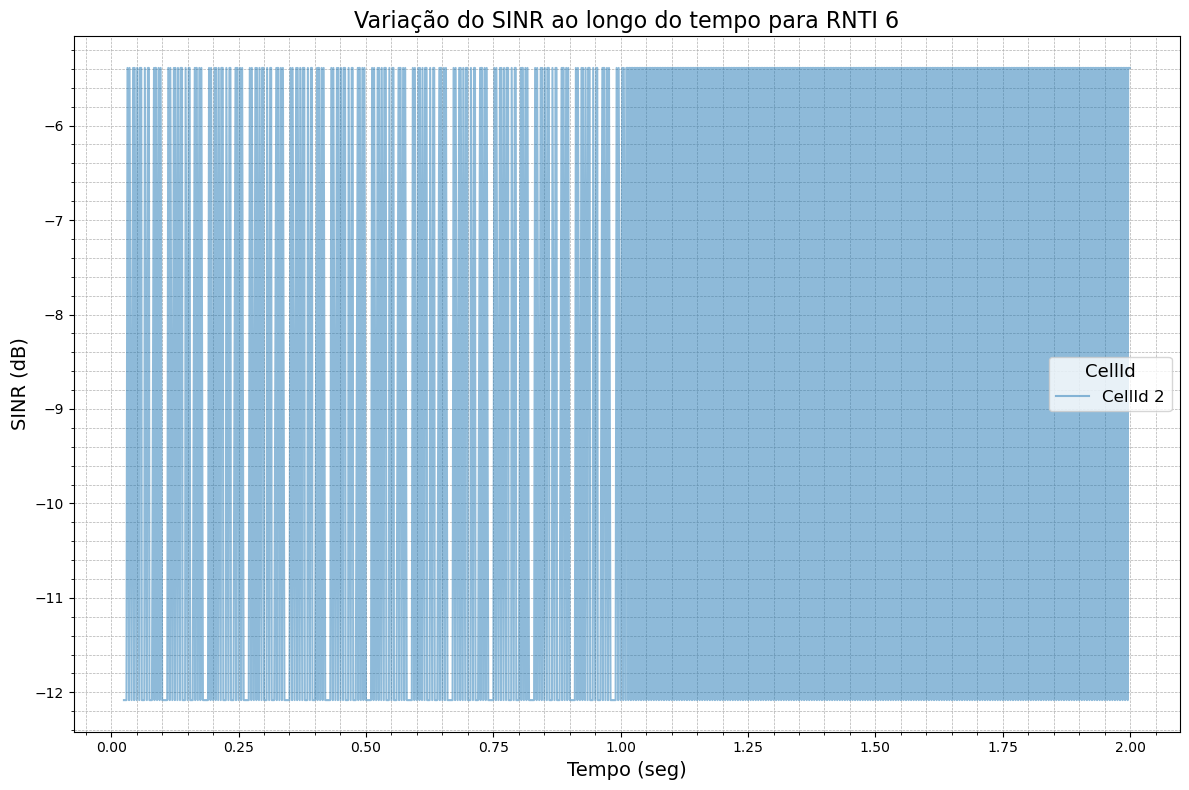

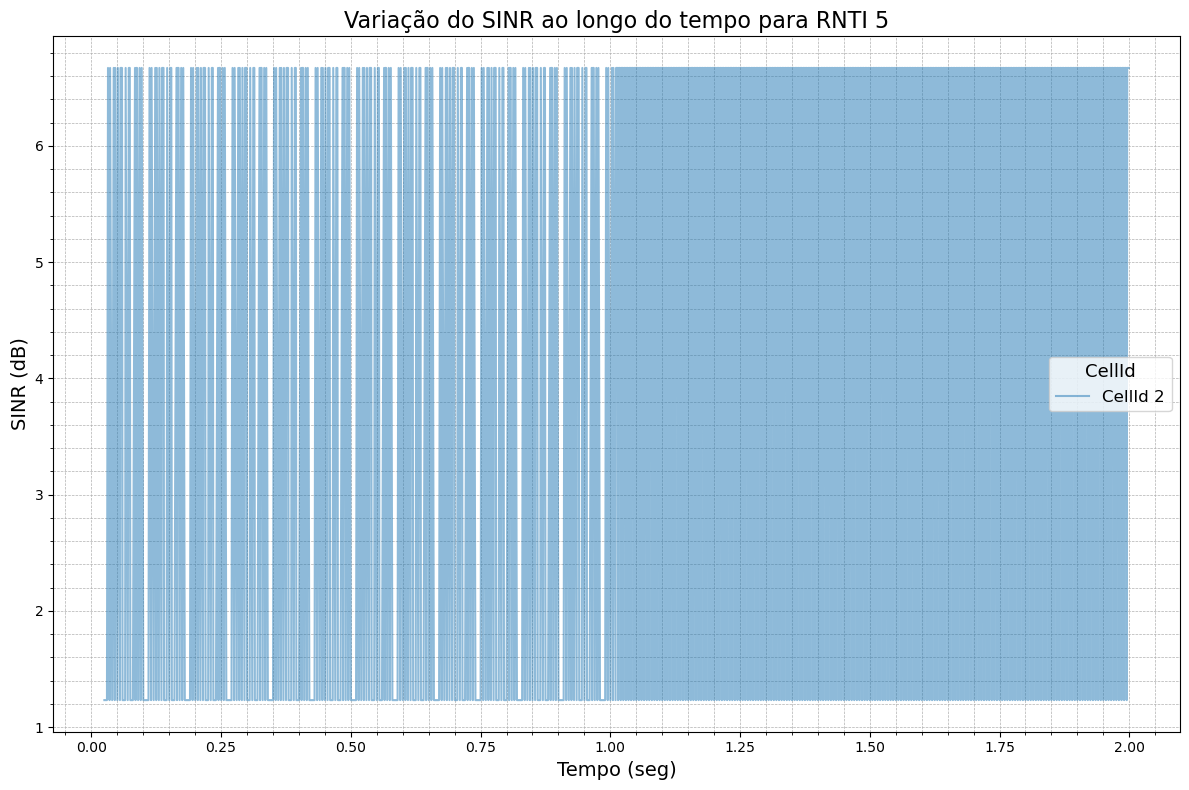

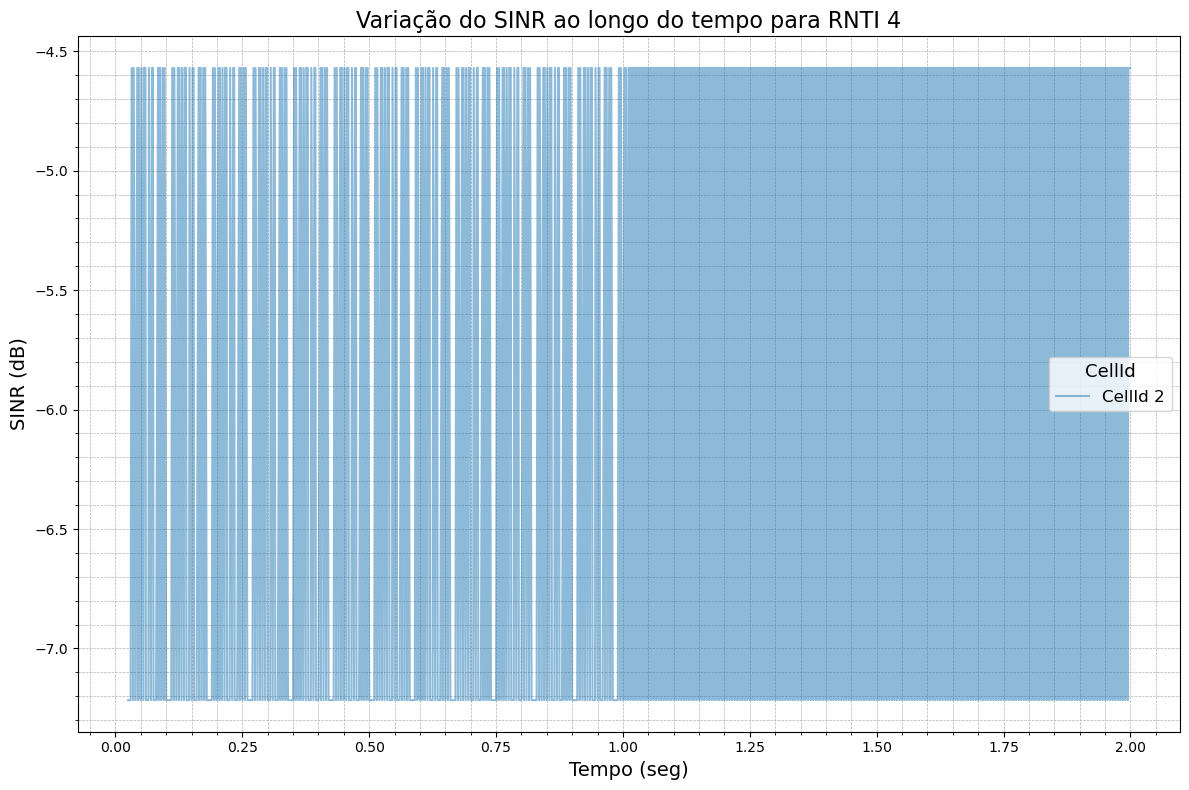

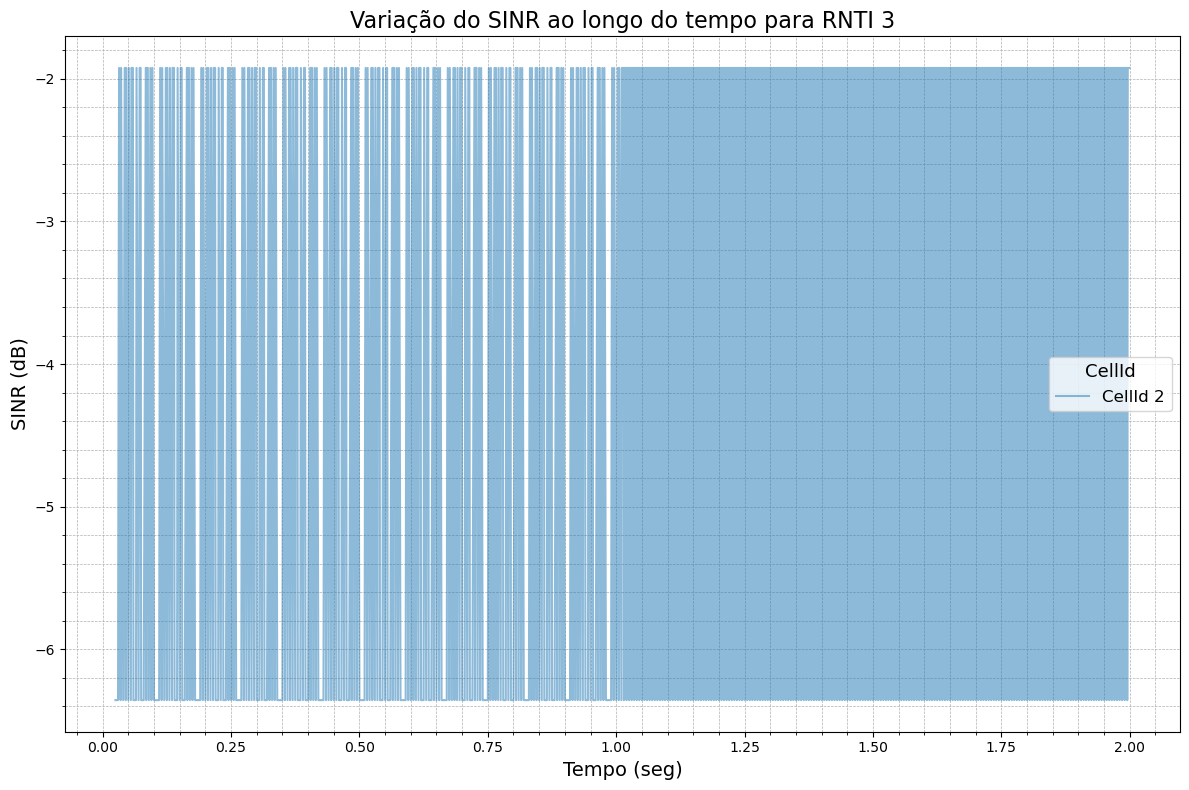

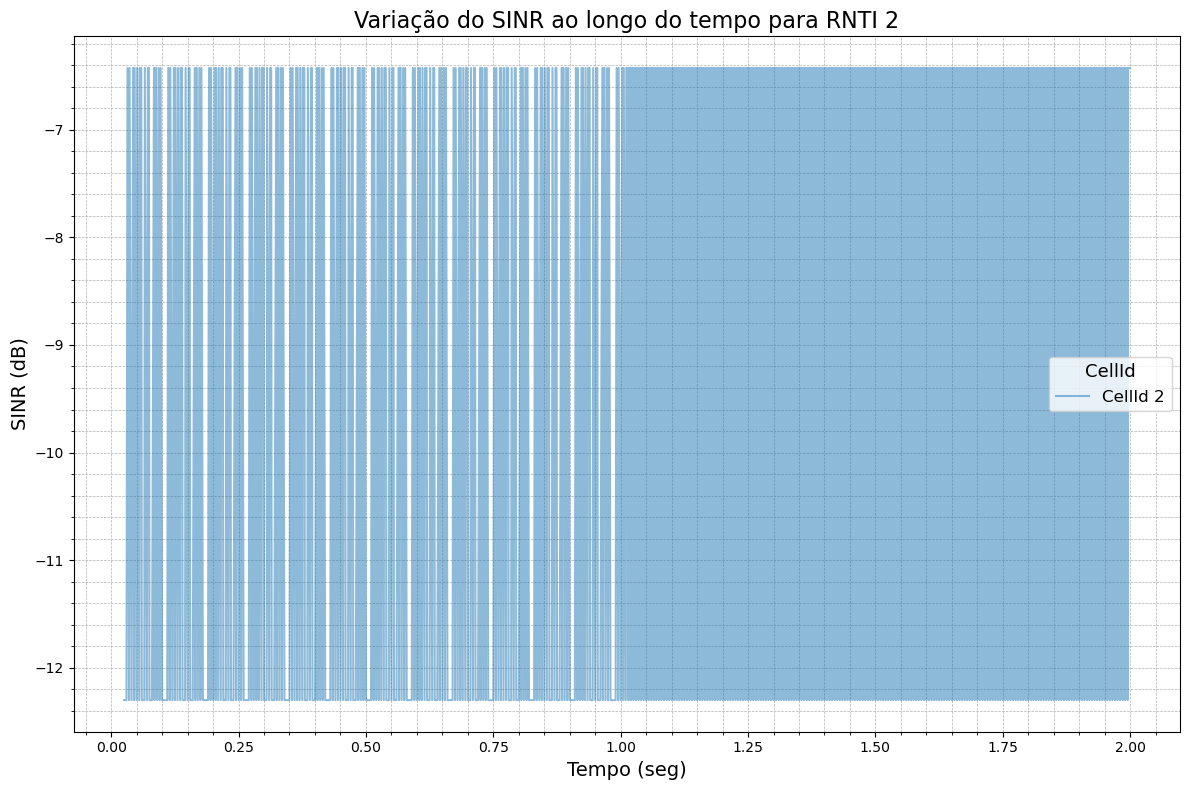

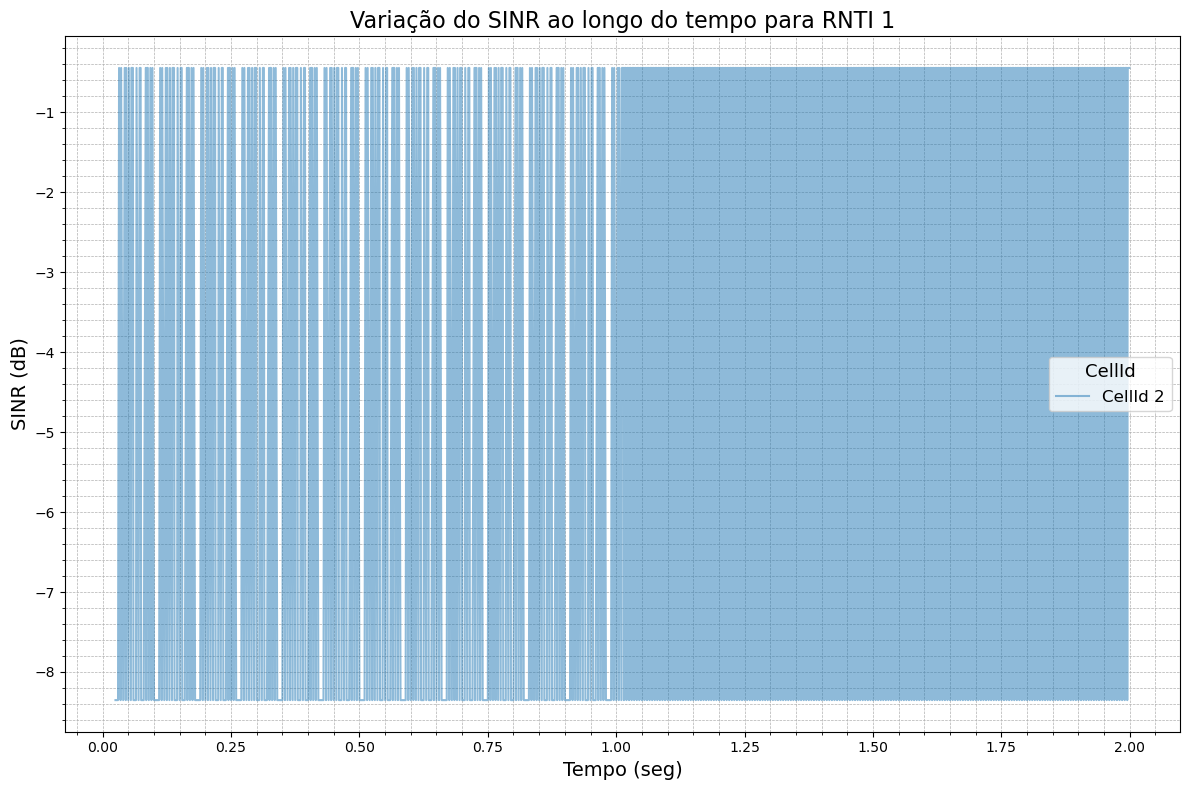

In [ ]:
# %%

# Plota a variação do SINR ao longo do tempo para cada RNTI, mostrando diferenças por CellId
for RNTI in rnti_values:
    plt.figure(figsize=(12, 8))
    for CellId in CellId_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', linestyle='-', linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez
    
    plt.title(f'Variação do SINR ao longo do tempo para RNTI {RNTI}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

In [ ]:
# %%

# Conta a quantidade de ocorrências de cada RNTI
df['RNTI'].value_counts()

RNTI
17    1382
18    1382
2     1382
3     1382
4     1382
5     1382
6     1382
7     1382
20    1382
19    1382
1     1382
8     1382
16    1382
15    1382
14    1382
13    1382
12    1382
11    1382
10    1382
9     1382
0      100
Name: count, dtype: int64